In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat

# Импорт данных

In [2]:
books= pd.read_csv('books.csv')
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [3]:
books.shape

(10000, 23)

In [4]:
ratings = pd.read_csv('ratings.csv')

ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [5]:
tags = pd.read_csv('book_tags.csv')
tags.tail()

,goodreads_book_id,tag_id,count
999907,33288638,21303,7
999908,33288638,17271,7
999909,33288638,1126,7
999910,33288638,11478,7
999911,33288638,27939,7


In [6]:
btags = pd.read_csv('tags.csv')
btags.tail()

,tag_id,tag_name
34247,34247,Ｃhildrens
34248,34248,Ｆａｖｏｒｉｔｅｓ
34249,34249,Ｍａｎｇａ
34250,34250,ＳＥＲＩＥＳ
34251,34251,ｆａｖｏｕｒｉｔｅｓ


# Очистка данных, удаление дубликатов

In [7]:
ratings=ratings.sort_values("user_id")
ratings.shape

(981756, 3)

In [8]:
ratings.drop_duplicates(subset =["user_id","book_id"], 
                     keep = False, inplace = True) 
ratings.shape

(977269, 3)

Таким образом, в данных присутствовало 4487 дубликатов, которые были удалены.

In [9]:
print(books.shape)
books.drop_duplicates(subset='original_title',keep=False,inplace=True)
print(books.shape)

(10000, 23)
(9151, 23)


Удалено 849 строк.

In [10]:
print(btags.shape)
btags.drop_duplicates(subset='tag_id',keep=False,inplace=True)
print(btags.shape)

(34252, 2)
(34252, 2)


В наборе данных book_tags нет дубликатов.

In [11]:
print(tags.shape)
tags.drop_duplicates(subset=['tag_id','goodreads_book_id'],keep=False,inplace=True)
print(tags.shape)

(999912, 3)
(999896, 3)


# Визуализация данных

In [12]:
joint_tags=pd.merge(tags,btags,left_on='tag_id',right_on='tag_id',how='inner')

* 10 лучших книг по рейтингу

In [13]:
top_rated=books.sort_values('average_rating', ascending=False)
top10=top_rated.head(10)
f=['title']
displ=(top10[f])
displ.set_index('title', inplace=True)
displ


""
title
The Complete Calvin and Hobbes
"Words of Radiance (The Stormlight Archive, #2)"
Mark of the Lion Trilogy
It's a Magical World: A Calvin and Hobbes Collection
There's Treasure Everywhere: A Calvin and Hobbes Collection
"Harry Potter Boxset (Harry Potter, #1-7)"
"Harry Potter Collection (Harry Potter, #1-6)"
The Indispensable Calvin and Hobbes
The Authoritative Calvin and Hobbes: A Calvin and Hobbes Treasury


* Топ-10 самых популярных книг

In [14]:
pop10=books.sort_values(by='ratings_count', ascending=False)
f=['title']
pop10=pop10.head(10)

pop10=(pop10[f])
pop10=pop10.set_index('title')
pop10

""
title
"The Hunger Games (The Hunger Games, #1)"
"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"
To Kill a Mockingbird
The Great Gatsby
The Fault in Our Stars
The Hobbit
The Catcher in the Rye
Pride and Prejudice
"Angels & Demons (Robert Langdon, #1)"


* Наиболее распространенные рейтинговые значения

C:\Users\Daniil\AppData\Local\Temp\ipykernel_9580\2532399123.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=books['average_rating'], kde=True, color='r')


<Axes: xlabel='average_rating', ylabel='Density'>

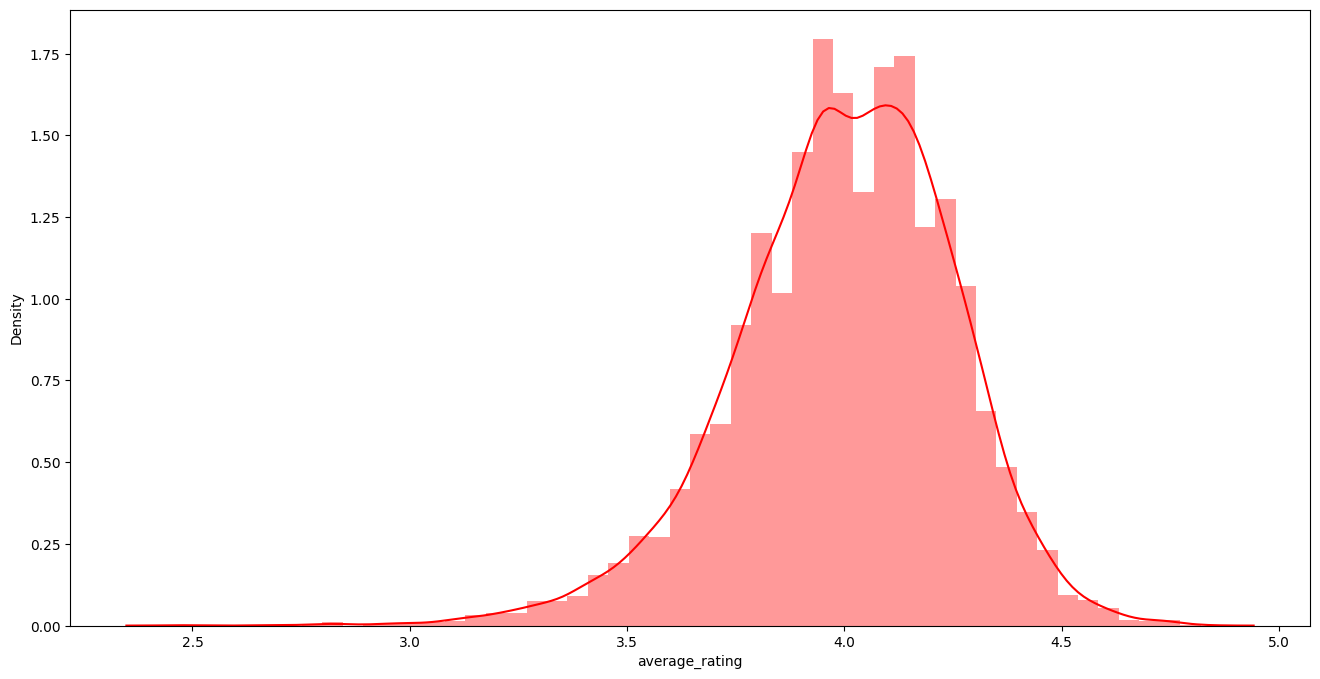

In [15]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.distplot(a=books['average_rating'], kde=True, color='r')

Таким образом, наиболее распространенная оценка находится где-то между 3,5 и 4 баллами.

In [16]:
no_of_ratings_per_book=ratings.groupby('book_id').count()
no_of_ratings_per_book

,user_id,rating
book_id,,
1,100,100
2,100,100
3,100,100
4,100,100
5,100,100
...,...,...
9996,96,96
9997,89,89
9998,95,95


C:\Users\Daniil\AppData\Local\Temp\ipykernel_9580\757000965.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=no_of_ratings_per_book['rating'], color='g')


<Axes: xlabel='rating', ylabel='Density'>

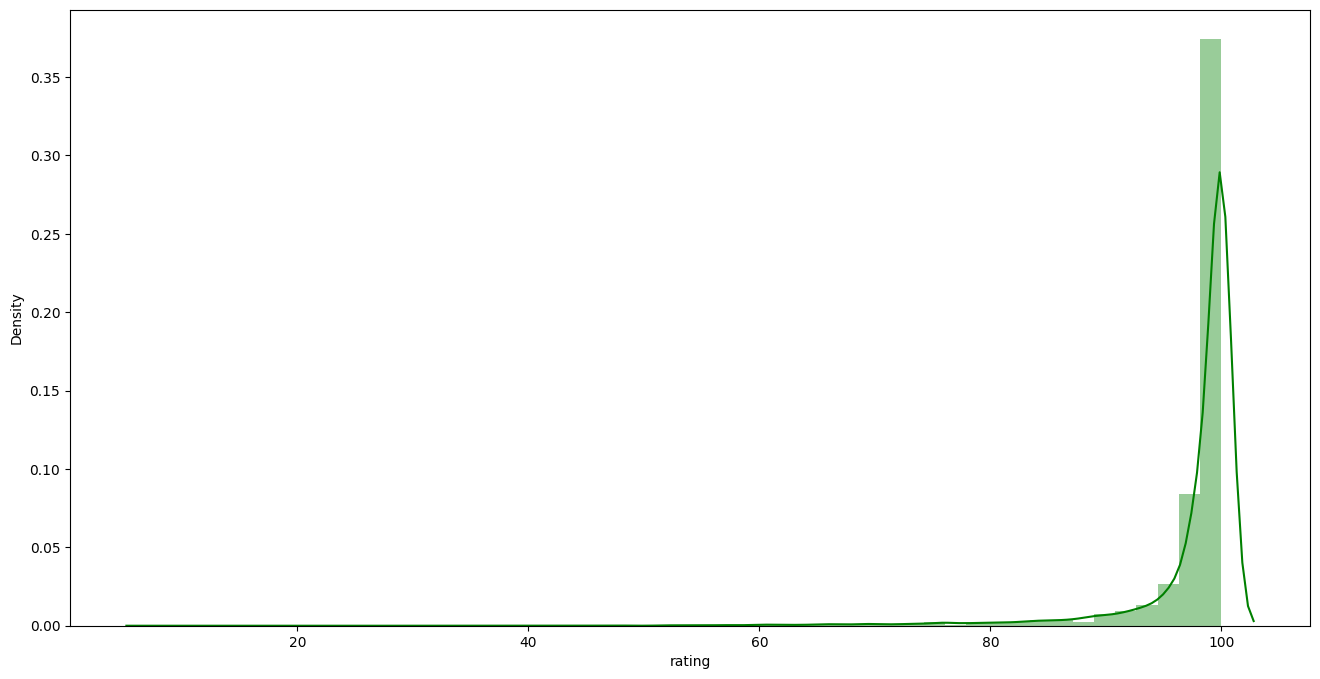

In [17]:
plt.figure(figsize=(16,8))
sns.distplot(a=no_of_ratings_per_book['rating'], color='g')

Видно, что количество оценок большинства книг превышает 80. Это большая аудитория.

* Авторы с высоким рейтингом

In [18]:
f=['authors', 'average_rating']
top_authors=top_rated[f]
top_authors=top_authors.head(20)

In [19]:
fig = px.bar(top_authors, x='authors', y='average_rating', color ='average_rating')
fig.show()

На графике выше показаны авторы с самым высоким рейтингом. Билл Уотерсон находится на вершине с колоссальным рейтингом 4,82

* Поиск популярных жанров и книг, доступных для них.

Итак, теги добавляются пользователями, и у нас нет ключевых слов для классификации книг по жанрам. Придётся жестко закодировть жанры и проверить, содержат ли теги эти значения. 

In [20]:
p=joint_tags.groupby('tag_name').count()

In [21]:
p=p.sort_values(by='count', ascending=False)
p

,goodreads_book_id,tag_id,count
tag_name,,,
to-read,9983,9983,9983
favorites,9881,9881,9881
owned,9856,9856,9856
books-i-own,9799,9799,9799
currently-reading,9776,9776,9776
...,...,...,...
hs,1,1,1
hrabal,1,1,1
hq-manga,1,1,1


Жесткое кодирование некоторых основных жанров

In [22]:
genres=["Art", "Biography", "Business", "Chick Lit", "Children's", "Christian", "Classics", "Comics", "Contemporary", "Cookbooks", "Crime", "Ebooks", "Fantasy", "Fiction", "Gay and Lesbian", "Graphic Novels", "Historical Fiction", "History", "Horror", "Humor and Comedy", "Manga", "Memoir", "Music", "Mystery", "Nonfiction", "Paranormal", "Philosophy", "Poetry", "Psychology", "Religion", "Romance", "Science", "Science Fiction", "Self Help", "Suspense", "Spirituality", "Sports", "Thriller", "Travel", "Young Adult"]
for i in range(len(genres)):
    genres[i]=genres[i].lower()

In [23]:
new_tags=p[p.index.isin(genres)]

In [24]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=new_tags['count'],
            y=new_tags.index,
            orientation='h'))

fig.show()

* Анализ взаимосвязи между количеством изданий и рейтингами

In [25]:
fig = px.line(books, y="books_count", x="average_rating", title='Book Count VS Average Rating')
fig.show()

Можно увидеть, что средний рейтинг увеличивается с увеличением количества изданий книги, но уменьшается после того, как количество достигает примерно 2500. Итак, чем больше количество изданий, тем меньше средний рейтинг.

* Предпочитают ли читатели короткие заголовки или длинные?

In [26]:
books['length-title']=books['original_title'].str.len()

<Axes: xlabel='length-title', ylabel='average_rating'>

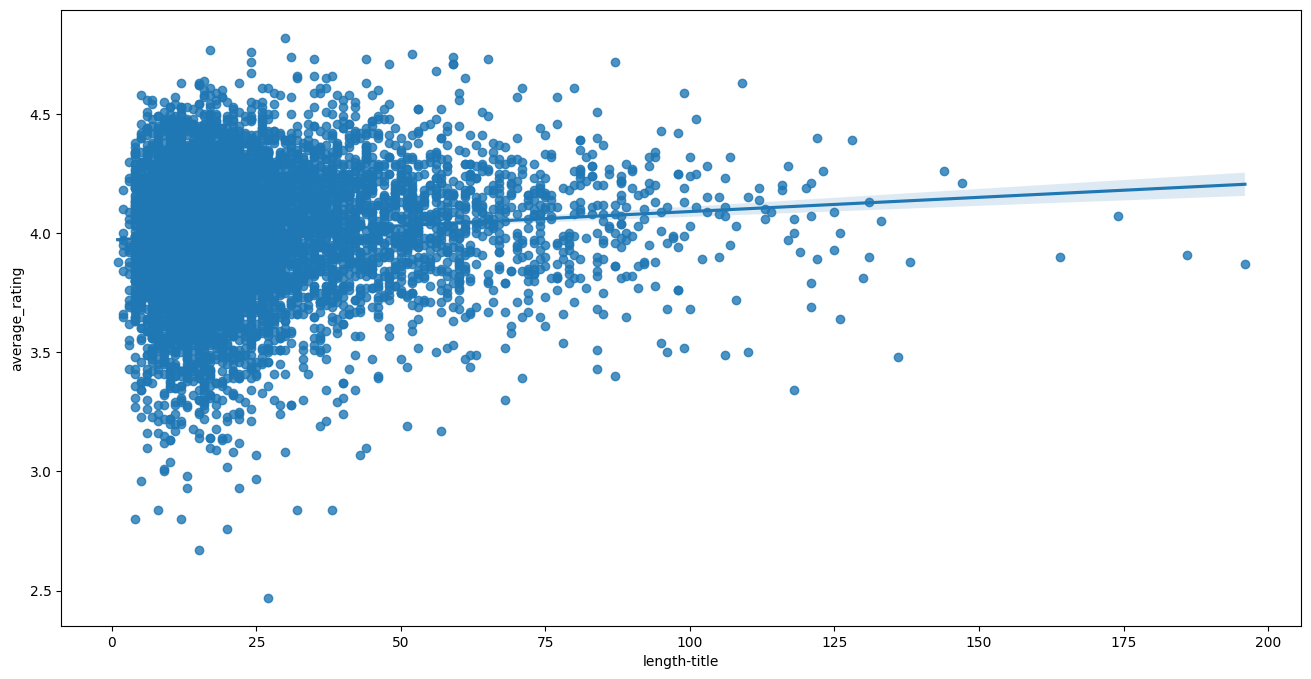

In [27]:
plt.figure(figsize=(16,8))
sns.regplot(x=books['length-title'], y=books['average_rating'])

Итак, книги с высоким рейтингом имеют довольно короткие названия. График показывает, что можно провести прямую линию, но очень приблизительно, чтобы сказать, что по мере увеличения длины названия рейтинг остается постоянным (около 4).

# Рекомендационнная система

Механизм рекомендаций фильтрует данные, используя различные алгоритмы, и рекомендует пользователям наиболее релевантные элементы. нами был выбран Content Based подход: этот подход анализирует доступный контент и находит сходство между ними, а затем рекомендует полученные элементы, которые имеют высокое сходство.

Content Based подход будет основан на следующих факторах:

1. Название
2. Авторы
3. Средний рейтинг

In [28]:
fillnabooks= books.fillna('')

Очистка данных - перевод всех слов в нижний регистр

In [29]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

Только извлечение объектов из заданных данных,

In [30]:
features=['original_title','authors','average_rating']
fillednabooks=fillnabooks[features]

In [31]:
fillednabooks = fillednabooks.astype(str)
fillednabooks.dtypes

original_title    object
authors           object
average_rating    object
dtype: object

In [32]:
for feature in features:
    fillednabooks[feature] = fillednabooks[feature].apply(clean_data)
    
fillednabooks.head(2)

,original_title,authors,average_rating
0,thehungergames,suzannecollins,4.34
1,harrypotterandthephilosopher'sstone,"j.k.rowling,marygrandpré",4.44


Создаем "суп"(пакет слов) для всех строк.

In [33]:
def create_soup(x):
    return x['original_title']+ ' ' + x['authors'] + ' ' + x['average_rating']

In [34]:
fillednabooks['soup'] = fillednabooks.apply(create_soup, axis=1)

Импорт count vectorizer для частот терминов.

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(fillednabooks['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [36]:
fillednabooks=fillednabooks.reset_index()
indices = pd.Series(fillednabooks.index, index=fillednabooks['original_title'])

In [37]:
def get_recommendations_new(title, cosine_sim=cosine_sim2):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Получаем оценки попарного сходства всех фильмов с этим фильмом
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Отсортируем фильмы по показателям сходства
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Получаем оценки 10 самых похожих фильмов
    sim_scores = sim_scores[1:11]

    # Получаем индексы фильмов
    movie_indices = [i[0] for i in sim_scores]

    # Возвращаем топ-10 самых похожих фильмов
    return list(books['original_title'].iloc[movie_indices])

In [53]:
l=get_recommendations_new('The Hobbit', cosine_sim2)
fig = go.Figure(data=[go.Table(header=dict(values=l,fill_color='orange'))
                     ])
fig.show()
print(l)

['Next', 'The Hobbit or There and Back Again', ' The Fellowship of the Ring', 'The Two Towers', 'The Return of the King', 'The Lord of the Rings', 'City of Heavenly Fire', 'The Tenth Circle', 'Luckiest Girl Alive', 'The Hobbit and The Lord of the Rings']


In [54]:
l=get_recommendations_new('Harry Potter and The Chamber of Secrets', cosine_sim2)
fig = go.Figure(data=[go.Table(header=dict(values=l,fill_color='orange'))
                     ])
fig.show()
print(l)

['Harry Potter and the Order of the Phoenix', 'Harry Potter and the Goblet of Fire', 'Harry Potter and the Deathly Hallows', 'Harry Potter Boxed Set Books 1-4', "Harry Potter and the Philosopher's Stone", 'Harry Potter and the Prisoner of Azkaban', 'Harry Potter and the Half-Blood Prince', 'The Casual Vacancy', 'Shadow Kiss', 'The Tales of Beedle the Bard']
